In [1]:
from work.dataset.activitynet import ActivityNetDataset
from work.models.decoder import RecurrentBinaryActivityDetectionNetwork
import numpy as np

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)

model = RecurrentBinaryActivityDetectionNetwork(1, 1, stateful=True)
model.load_weights('../models/training/lstm_activity_detection/lstm_activity_detection_01_e090.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using Theano backend.


Let's choose a video from the validation subset:

In [2]:
video = None
for v in dataset.get_subset_videos('validation'):
    if v.video_id == 'kt3hzGla8r4':
        video = v
print(video.serialize())

features_path = '../downloads/features/' + video.video_id + '.npy'
features = np.load(features_path)

{'annotations': [{'label': 'Playing guitarra', 'segment': [0.01, 4.599470923054609]}, {'label': 'Playing guitarra', 'segment': [6.01469274553295, 47.056125597404844]}, {'label': 'Playing guitarra', 'segment': [61.91595473342743, 154.61298410575878]}], 'resolution': '854x480', 'url': 'https://www.youtube.com/watch?v=kt3hzGla8r4', 'subset': 'validation', 'duration': 226.79, 'num_frames': 6793}


Now predict the output

In [3]:
print(features[:,:].shape)
nb_instances = features.shape[0]

features = features.reshape(nb_instances, 1, 4096)
print(features.shape)
model.reset_states()
Y = model.predict(features, batch_size=1)
Y = Y.reshape(nb_instances, 2)
YY = np.argmax(Y, axis=1)
y = Y[:,1]/np.sum(Y, axis=1)

(424, 4096)
(424, 1, 4096)


In [4]:
video.get_video_instances(16, 0)
ground_trouth = np.array([instance.activity_binary_output for instance in video.instances])
print(ground_trouth)

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
print(YY.shape)
YY=YY.reshape(nb_instances)
print(YY)
print(ground_trouth)

(424,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [6]:
print(YY==ground_trouth)

[False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
 False False False False False  True  True  True  True  True  True  True
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

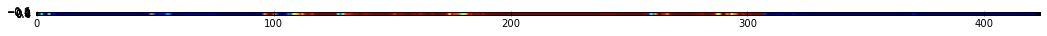

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(18, 5), dpi=100)
plt.imshow(np.array([y]))
plt.show()

In [8]:
YY.size

424